In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, HTML

nba_orig_df = pd.read_csv('nbaallelo.csv')
nba_orig_df = nba_orig_df[(nba_orig_df['lg_id']=='NBA') & (nba_orig_df['is_playoffs']==0)]
columns_to_keep = ['game_id','year_id','fran_id','pts','opp_pts','elo_n','opp_elo_n', 'game_location', 'game_result']
nba_orig_df = nba_orig_df[columns_to_keep]

# The dataframe for the assigned team is called assigned_team_df. 
# The assigned team is the Chicago Bulls from 1996-1998.
assigned_years_league_df = nba_orig_df[(nba_orig_df['year_id'].between(1996, 1998))]
assigned_team_df = assigned_years_league_df[(assigned_years_league_df['fran_id']=='Bulls')]
assigned_team_df = assigned_team_df.reset_index(drop=True)

display(HTML(assigned_team_df.head().to_html()))
print("printed only the first five observations...")
print("Number of rows in the data set =", len(assigned_team_df))

,game_id,year_id,fran_id,pts,opp_pts,elo_n,opp_elo_n,game_location,game_result
0,199511030CHI,1996,Bulls,105,91,1598.2924,1531.7449,H,W
1,199511040CHI,1996,Bulls,107,85,1604.3940,1458.6415,H,W
2,199511070CHI,1996,Bulls,117,108,1605.7983,1310.9349,H,W
3,199511090CLE,1996,Bulls,106,88,1618.8701,1452.8268,A,W
4,199511110CHI,1996,Bulls,110,106,1621.1591,1490.2861,H,W


printed only the first five observations...
('Number of rows in the data set =', 246)


In [2]:

# Range of years: 2013-2015 (Note: The line below selects ALL teams within the three-year period 2013-2015. This is not your team's dataframe.
your_years_leagues_df = nba_orig_df[(nba_orig_df['year_id'].between(2013, 2015))]

# The dataframe for your team is called your_team_df.
# ---- TODO: make your edits here ----
your_team_df = your_years_leagues_df[(your_years_leagues_df['fran_id']=='Heat')]
your_team_df = your_team_df.reset_index(drop=True)

display(HTML(your_team_df.head().to_html()))
print("printed only the first five observations...")
print("Number of rows in the data set =", len(your_team_df))
        

,game_id,year_id,fran_id,pts,opp_pts,elo_n,opp_elo_n,game_location,game_result
0,201210300MIA,2013,Heat,120,107,1666.3193,1586.1121,H,W
1,201211020NYK,2013,Heat,84,104,1647.6675,1548.2699,A,L
2,201211030MIA,2013,Heat,119,116,1650.0934,1554.4674,H,W
3,201211050MIA,2013,Heat,124,99,1656.5652,1504.0280,H,W
4,201211070MIA,2013,Heat,103,73,1659.7239,1361.5804,H,W


printed only the first five observations...
('Number of rows in the data set =', 246)


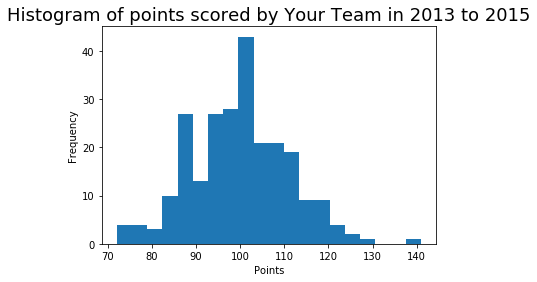

In [4]:
import seaborn as sns

# Histogram
fig, ax = plt.subplots()
plt.hist(your_team_df['pts'], bins=20)
plt.title('Histogram of points scored by Your Team in 2013 to 2015', fontsize=18)
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')
plt.show()
print("")

# # Scatterplot
# plt.title('Scatterplot of points scored by Your Team in 2013 to 2015', fontsize=18)
# sns.regplot(your_team_df['year_id'], your_team_df['pts'], ci=None)
# plt.show()

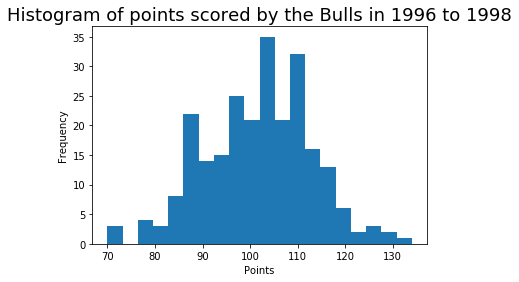

In [6]:
import seaborn as sns

# Histogram
fig, ax = plt.subplots()
plt.hist(assigned_team_df['pts'], bins=20)
plt.title('Histogram of points scored by the Bulls in 1996 to 1998', fontsize=18)
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')
plt.show()

# # Scatterplot
# plt.title('Scatterplot of points scored by the Bulls in 1996 to 1998', fontsize=18)
# sns.regplot(assigned_team_df['year_id'], assigned_team_df['pts'], ci=None)
# plt.show()

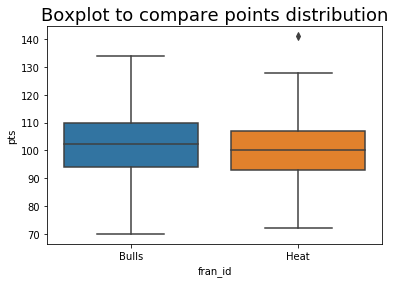

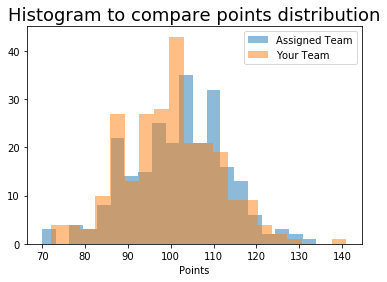

In [7]:
import seaborn as sns

# Side-by-side boxplots
both_teams_df = pd.concat((assigned_team_df, your_team_df))
plt.title('Boxplot to compare points distribution', fontsize=18) 
sns.boxplot(x='fran_id',y='pts',data=both_teams_df)
plt.show()
print("")

# Histograms
fig, ax = plt.subplots()
plt.hist(assigned_team_df['pts'], 20, alpha=0.5, label='Assigned Team')
plt.hist(your_team_df['pts'], 20, alpha=0.5, label='Your Team')
plt.title('Histogram to compare points distribution', fontsize=18) 
plt.xlabel('Points')
plt.legend(loc='upper right')
plt.show()

In [14]:
print("Your Team's Relative Skill in 2013 to 2015")
print("-------------------------------------------------------")

# ---- TODO: make your edits here ----
import statistics

mean = statistics.mean(your_team_df['elo_n'])
median = statistics.median(your_team_df['elo_n'])
variance = statistics.variance(your_team_df['elo_n'])
stdeviation = statistics.stdev(your_team_df['elo_n'])

print('Mean =', round(mean,2))
print('Median =', round(median,2))
print('Variance =', round(variance,2))
print('Standard Deviation =', round(stdeviation,2))

Your Team's Relative Skill in 2013 to 2015
-------------------------------------------------------
('Mean =', 1617.48)
('Median =', 1652.57)
('Variance =', 9987.2)
('Standard Deviation =', 99.94)


In [15]:
print("Assigned Team's Relative Skill in 1996 to 1998")
print("-------------------------------------------------------")

# ---- TODO: make your edits here ----
import statistics

mean2 = statistics.mean(assigned_team_df['elo_n'])
median2 = statistics.median(assigned_team_df['elo_n'])
variance2 = statistics.variance(assigned_team_df['elo_n'])
stdeviation2 = statistics.stdev(assigned_team_df['elo_n'])

print('Mean =', round(mean2,2))
print('Median =', round(median2,2))
print('Variance =', round(variance2,2))
print('Standard Deviation =', round(stdeviation2,2))

Assigned Team's Relative Skill in 1996 to 1998
-------------------------------------------------------
('Mean =', 1739.8)
('Median =', 1751.23)
('Variance =', 2651.55)
('Standard Deviation =', 51.49)


In [21]:
print("Confidence Interval for Average Relative Skill in the years 2013 to 2015")
print("------------------------------------------------------------------------------------------------------------")

import statistics
from scipy import stats as st
# Mean relative skill of all teams from the years 2013-2015
meann = statistics.mean(your_years_leagues_df['elo_n'])

# Standard deviation of the relative skill of all teams from the years 2013-2015
sstdev = statistics.stdev(your_years_leagues_df['elo_n'])

n = len(your_years_leagues_df)

#Confidence interval
# ---- TODO: make your edits here ----
sstderr = sstdev/(n ** 0.5)
conf_int_95 = st.norm.interval(0.95, mean, sstderr)

print("95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 2013 to 2015 =", conf_int_95)
print("95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = (",  round(conf_int_95[0], 2),",", round(conf_int_95[1], 2),")")


print("\n")
print("Probability a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 2013 to 2015")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

mean_elo_your_team = statistics.mean(your_team_df['elo_n'])

choice1 = st.norm.sf(mean_elo_your_team, meann, sstdev)
choice2 = st.norm.cdf(mean_elo_your_team, meann, sstdev)

# Pick the correct answer.
print("Which of the two choices is correct?")
print("Choice 1 =", round(choice1,4))
print("Choice 2 =", round(choice2,4))

Confidence Interval for Average Relative Skill in the years 2013 to 2015
------------------------------------------------------------------------------------------------------------
('95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 2013 to 2015 =', (1614.9004744184529, 1620.059247532767))
('95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = (', 1614.9, ',', 1620.06, ')')


Probability a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 2013 to 2015
----------------------------------------------------------------------------------------------------------------------------------------------------------
Which of the two choices is correct?
('Choice 1 =', 0.159)
('Choice 2 =', 0.841)


In [23]:
print("Confidence Interval for Average Relative Skill in the years 1996 to 1998")
print("------------------------------------------------------------------------------------------------------------")

import statistics
from scipy import stats as st
# Mean relative skill of all teams from the years 2013-2015
mean3 = statistics.mean(assigned_years_league_df['elo_n'])

# Standard deviation of the relative skill of all teams from the years 2013-2015
stdev3 = statistics.stdev(assigned_years_league_df['elo_n'])

n = len(assigned_years_league_df)

#Confidence interval
# ---- TODO: make your edits here ----
stderr2 = stdev3/(n ** 0.5)
conf_int_95 = st.norm.interval(0.95, mean3, stderr2)

print("95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 2013 to 2015 =", conf_int_95)
print("95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = (",  round(conf_int_95[0], 2),",", round(conf_int_95[1], 2),")")


print("\n")
print("Probability a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 2013 to 2015")
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

mean_elo_assigned_team = statistics.mean(assigned_years_league_df['elo_n'])

choice1 = st.norm.sf(mean_elo_assigned_team, mean3, stdev3)
choice2 = st.norm.cdf(mean_elo_assigned_team, mean3, stdev3)

# Pick the correct answer.
print("Which of the two choices is correct?")
print("Choice 1 =", round(choice1,4))
print("Choice 2 =", round(choice2,4))

Confidence Interval for Average Relative Skill in the years 1996 to 1998
------------------------------------------------------------------------------------------------------------
('95% confidence interval (unrounded) for Average Relative Skill (ELO) in the years 2013 to 2015 =', (1487.6565859527095, 1493.6465501840999))
('95% confidence interval (rounded) for Average Relative Skill (ELO) in the years 2013 to 2015 = (', 1487.66, ',', 1493.65, ')')


Probability a team has Average Relative Skill LESS than the Average Relative Skill (ELO) of your team in the years 2013 to 2015
----------------------------------------------------------------------------------------------------------------------------------------------------------
Which of the two choices is correct?
('Choice 1 =', 0.5)
('Choice 2 =', 0.5)
